# Libraries

Load required libraries

In [257]:
import numpy as np
import pandas as pd
import io
#import requests
import matplotlib.pyplot as plt
import warnings
from IPython.display import Markdown as md
import seaborn as sb
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt


warnings.filterwarnings('ignore')
# set to show all columns
pd.set_option('display.max_columns', 55)

## Functions

In [258]:
def forecast_accuracy(alpha, forecast, actual):
    MAPE = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    RMSE = np.mean((forecast - actual)**2)**.5  # RMSE
    print('****************************************')
    print('With alpha value as ', alpha)
    print("{:<15} {:<10}".format('Matrices','Values'))
    dict_val = {'MAPE':MAPE, 'RMSE':RMSE}
        
    return (dict_val)


## Data setup

In [259]:
# Import data
df2 = pd.read_csv('https://raw.githubusercontent.com/JohnKHancock/CUNY_DATA_698_Maters_Project/main/raw_data/final-ny-data-v2.csv'
                  , parse_dates = ['date'])

# Select PositiveIncrease data
positiveIncrease_df = df2[['date','positiveIncrease']]
positiveIncrease_df = positiveIncrease_df.sort_values(by='date')

# Create a timeseries dataframe from the final data set that has 2 columns
positiveIncrease_df['date'] = pd.to_datetime(positiveIncrease_df['date'])
positiveIncrease_df.set_index('date', inplace=True)


# Create training and test data for positiveIncrease data
positive_train_data  = positiveIncrease_df.iloc[:90]
positive_test_data = positiveIncrease_df.iloc[90:]


# Select deathIncrease data
deathIncrease_df = df2[['date','deathIncrease']]
deathIncrease_df = deathIncrease_df.sort_values(by='date')


# Create a timeseries dataframe from the final data set that has 2 columns
deathIncrease_df['date'] = pd.to_datetime(deathIncrease_df['date'])

# Create training and test data for dealthIncrease daa
deathIncrease_train_data  = deathIncrease_df.iloc[:90]
deathIncrease_test_data = deathIncrease_df.iloc[90:]

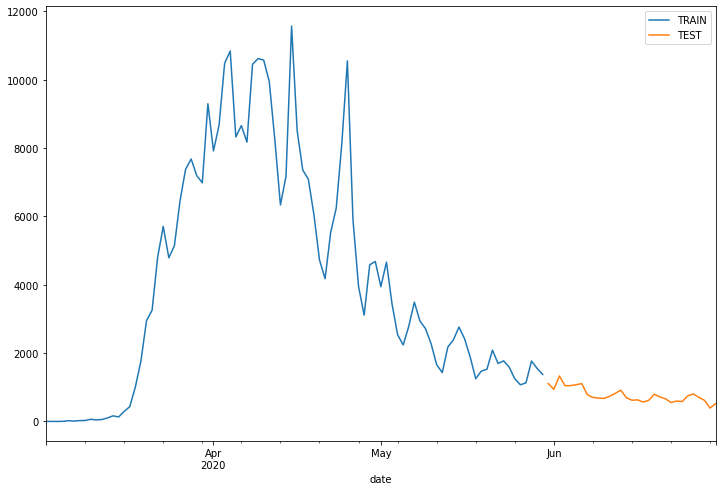

In [260]:
positive_train_data['positiveIncrease'].plot(legend=True, label='TRAIN')
positive_test_data['positiveIncrease'].plot(legend=True, label='TEST', figsize=(12,8))

## Models explored

We are going to explore below models 
1. Simple Exponential Smoothing
2. Holt-Winters

# Simple Exponential Smoothing

Single Exponential Smoothing, SES , aka Simple Exponential Smoothing, is a time series forecasting method for data without a trend or seasonality. It requires a single parameter, called alpha, also called the smoothing factor. This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model is influenced mostly by the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [261]:
alpha=0.2
model = SimpleExpSmoothing(positive_train_data['positiveIncrease']).fit(smoothing_level=alpha)
test_predictions_a2 = model.forecast(len(test_data))

alpha=0.6
model = SimpleExpSmoothing(positive_train_data['positiveIncrease']).fit(smoothing_level=alpha)
test_predictions_a6 = model.forecast(len(test_data))

alpha=0.8
model = SimpleExpSmoothing(positive_train_data['positiveIncrease']).fit(smoothing_level=alpha)
test_predictions_a8 = model.forecast(len(test_data))


### Plotting the predictions on positiveIncrease in cases

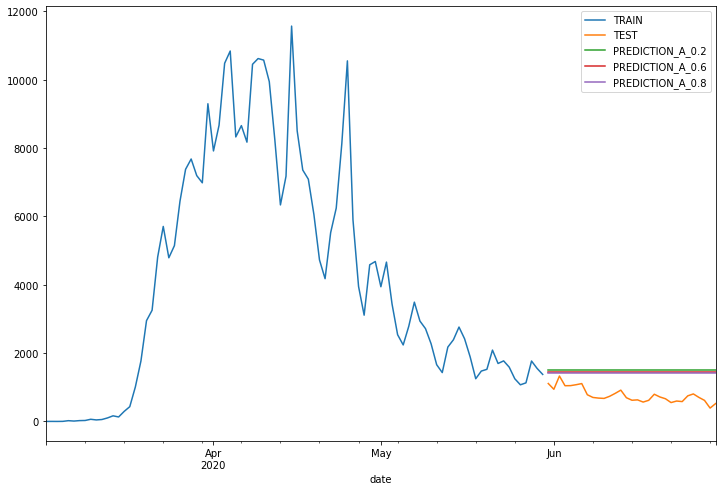

In [262]:

#Plot the predictions
positive_train_data['positiveIncrease'].plot(legend=True,label='TRAIN')
positive_test_data['positiveIncrease'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions_a2.plot(legend=True,label='PREDICTION_A_0.2')
test_predictions_a6.plot(legend=True,label='PREDICTION_A_0.6')
test_predictions_a8.plot(legend=True,label='PREDICTION_A_0.8')

### Model accuracy for increase in positive cases

In [263]:
alpha = 0.2
print(forecast_accuracy(0.2, test_predictions_a2, positive_test_data['positiveIncrease']))
alpha = 0.6
print(forecast_accuracy(0.6, test_predictions_a6, positive_test_data['positiveIncrease']))
alpha = 0.8
print(forecast_accuracy(0.8, test_predictions_a8, positive_test_data['positiveIncrease']))

****************************************
With alpha value as  0.2
Matrices        Values    
{'MAPE': 1.1089491998440164, 'RMSE': 772.3279164369299}
****************************************
With alpha value as  0.6
Matrices        Values    
{'MAPE': 1.0119072141993495, 'RMSE': 705.5926704299545}
****************************************
With alpha value as  0.8
Matrices        Values    
{'MAPE': 0.973805558271368, 'RMSE': 679.5445299984463}


### Model accuracy for increase in deaths

In [264]:

# Select PositiveIncrease data
deathIncrease_df = df2[['date','deathIncrease']]
deathIncrease_df = deathIncrease_df.sort_values(by='date')

# Create a timeseries dataframe from the final data set that has 2 columns
deathIncrease_df['date'] = pd.to_datetime(deathIncrease_df['date'])
deathIncrease_df.set_index('date', inplace=True)


# Create training and test data 
deathIncrease_train_data  = deathIncrease_df.iloc[:90]
deathIncrease_test_data = deathIncrease_df.iloc[90:]

alpha=0.2
model = SimpleExpSmoothing(deathIncrease_train_data['deathIncrease']).fit(smoothing_level=alpha)
test_predictions_a2 = model.forecast(len(deathIncrease_test_data))

alpha=0.6
model = SimpleExpSmoothing(deathIncrease_train_data['deathIncrease']).fit(smoothing_level=alpha)
test_predictions_a6 = model.forecast(len(deathIncrease_test_data))

alpha=0.8
model = SimpleExpSmoothing(deathIncrease_train_data['deathIncrease']).fit(smoothing_level=alpha)
test_predictions_a8 = model.forecast(len(deathIncrease_test_data))

alpha = 0.2
print(forecast_accuracy(0.2, test_predictions_a2, deathIncrease_test_data['deathIncrease']))
alpha = 0.6
print(forecast_accuracy(0.6, test_predictions_a6, deathIncrease_test_data['deathIncrease']))
alpha = 0.8
print(forecast_accuracy(0.8, test_predictions_a8, deathIncrease_test_data['deathIncrease']))

****************************************
With alpha value as  0.2
Matrices        Values    
{'MAPE': 2.9620409087442434, 'RMSE': 56.58367967520608}
****************************************
With alpha value as  0.6
Matrices        Values    
{'MAPE': 2.0914379856258942, 'RMSE': 38.822074801892434}
****************************************
With alpha value as  0.8
Matrices        Values    
{'MAPE': 2.0600294229698393, 'RMSE': 38.203890764672956}


### Model accuracy for hospitalized cases

In [265]:

# Select PositiveIncrease data
hospitalized_df = df2[['date','hospitalized']]
hospitalized_df = hospitalized_df.sort_values(by='date')

# Create a timeseries dataframe from the final data set that has 2 columns
hospitalized_df['date'] = pd.to_datetime(hospitalized_df['date'])
hospitalized_df.set_index('date', inplace=True)


# Create training and test data 
hospitalized_train_data  = hospitalized_df.iloc[:90]
hospitalized_test_data = hospitalized_df.iloc[90:]

alpha=0.2
model = SimpleExpSmoothing(hospitalized_train_data['hospitalized']).fit(smoothing_level=alpha)
test_predictions_a2 = model.forecast(len(hospitalized_test_data))

alpha=0.6
model = SimpleExpSmoothing(hospitalized_train_data['hospitalized']).fit(smoothing_level=alpha)
test_predictions_a6 = model.forecast(len(hospitalized_test_data))

alpha=0.8
model = SimpleExpSmoothing(hospitalized_train_data['hospitalized']).fit(smoothing_level=alpha)
test_predictions_a8 = model.forecast(len(hospitalized_test_data))

alpha = 0.2
print(forecast_accuracy(0.2, test_predictions_a2, hospitalized_test_data['hospitalized']))
alpha = 0.6
print(forecast_accuracy(0.6, test_predictions_a6, hospitalized_test_data['hospitalized']))
alpha = 0.8
print(forecast_accuracy(0.8, test_predictions_a8, hospitalized_test_data['hospitalized']))

****************************************
With alpha value as  0.2
Matrices        Values    
{'MAPE': 0.015504676639026055, 'RMSE': 1397.843947857355}
****************************************
With alpha value as  0.6
Matrices        Values    
{'MAPE': 0.007709803260211329, 'RMSE': 699.3968328726138}
****************************************
With alpha value as  0.8
Matrices        Values    
{'MAPE': 0.006859566600441719, 'RMSE': 623.5988382521072}


# HOLT Winters model

The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level, one for the trend and one for the seasonal component. Since we are using intial data set for 120 days, we do not have a seasonal factor at play here. Therefore, we are going to choose just smoothing level and the trend. 

In [266]:


alpha=0.2

model = Holt(positive_train_data['positiveIncrease']).fit(smoothing_level=alpha, smoothing_slope=0.2)
hwtest_predictions_a2 = model.forecast(len(test_data))

alpha=0.6
model = Holt(positive_train_data['positiveIncrease']).fit(smoothing_level=alpha, smoothing_slope=0.2)
hwtest_predictions_a6 = model.forecast(len(test_data))

alpha=0.8
model = Holt(positive_train_data['positiveIncrease']).fit(smoothing_level=alpha, smoothing_slope=0.2)
hwtest_predictions_a8 = model.forecast(len(test_data))


### Plotting the predictions on positiveIncrease in cases

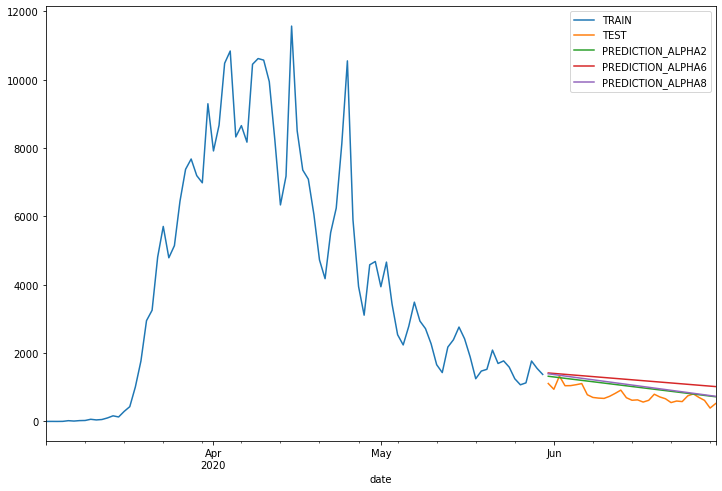

In [267]:
positive_train_data['positiveIncrease'].plot(legend=True,label='TRAIN')
positive_test_data['positiveIncrease'].plot(legend=True,label='TEST',figsize=(12,8))
hwtest_predictions_a2.plot(legend=True,label='PREDICTION_ALPHA2')
hwtest_predictions_a6.plot(legend=True,label='PREDICTION_ALPHA6')
hwtest_predictions_a8.plot(legend=True,label='PREDICTION_ALPHA8')

### Model accuracy for increase in positive cases

In [268]:
alpha = 0.2
print(forecast_accuracy(0.2, hwtest_predictions_a2, positive_test_data['positiveIncrease']))
alpha = 0.6
print(forecast_accuracy(0.6, hwtest_predictions_a6, positive_test_data['positiveIncrease']))
alpha = 0.8
print(forecast_accuracy(0.8, hwtest_predictions_a8, positive_test_data['positiveIncrease']))

****************************************
With alpha value as  0.2
Matrices        Values    
{'MAPE': 0.37988659419985, 'RMSE': 288.1078140569234}
****************************************
With alpha value as  0.6
Matrices        Values    
{'MAPE': 0.6687114304154188, 'RMSE': 472.62230799266825}
****************************************
With alpha value as  0.8
Matrices        Values    
{'MAPE': 0.43243517151529454, 'RMSE': 328.20563665884816}


### Model accuracy for increase in deaths

In [269]:

alpha=0.2
model = Holt(deathIncrease_train_data['deathIncrease']).fit(smoothing_level=alpha, smoothing_slope=0.2)
test_predictions_a2 = model.forecast(len(deathIncrease_test_data))

alpha=0.6
model = Holt(deathIncrease_train_data['deathIncrease']).fit(smoothing_level=alpha, smoothing_slope=0.2)
test_predictions_a6 = model.forecast(len(deathIncrease_test_data))

alpha=0.8
model = Holt(deathIncrease_train_data['deathIncrease']).fit(smoothing_level=alpha, smoothing_slope=0.2)
test_predictions_a8 = model.forecast(len(deathIncrease_test_data))

alpha = 0.2
print(forecast_accuracy(0.2, test_predictions_a2, deathIncrease_test_data['deathIncrease']))
alpha = 0.6
print(forecast_accuracy(0.6, test_predictions_a6, deathIncrease_test_data['deathIncrease']))
alpha = 0.8
print(forecast_accuracy(0.8, test_predictions_a8, deathIncrease_test_data['deathIncrease']))

****************************************
With alpha value as  0.2
Matrices        Values    
{'MAPE': 3.983749323042106, 'RMSE': 75.97140758401116}
****************************************
With alpha value as  0.6
Matrices        Values    
{'MAPE': 3.511319461986791, 'RMSE': 66.8287740135554}
****************************************
With alpha value as  0.8
Matrices        Values    
{'MAPE': 3.154622816990346, 'RMSE': 60.14681662921926}


### Model accuracy for hospitalized cases

In [270]:

alpha=0.2
model = Holt(hospitalized_train_data['hospitalized']).fit(smoothing_level=alpha, smoothing_slope=0.2)
test_predictions_a2 = model.forecast(len(hospitalized_test_data))

alpha=0.6
model = Holt(hospitalized_train_data['hospitalized']).fit(smoothing_level=alpha, smoothing_slope=0.2)
test_predictions_a6 = model.forecast(len(hospitalized_test_data))

alpha=0.8
model = Holt(hospitalized_train_data['hospitalized']).fit(smoothing_level=alpha, smoothing_slope=0.2)
test_predictions_a8 = model.forecast(len(hospitalized_test_data))

alpha = 0.2
print(forecast_accuracy(0.2, test_predictions_a2, hospitalized_test_data['hospitalized']))
alpha = 0.6
print(forecast_accuracy(0.6, test_predictions_a6, hospitalized_test_data['hospitalized']))
alpha = 0.8
print(forecast_accuracy(0.8, test_predictions_a8, hospitalized_test_data['hospitalized']))

****************************************
With alpha value as  0.2
Matrices        Values    
{'MAPE': 0.028568039915220594, 'RMSE': 3023.7152795946145}
****************************************
With alpha value as  0.6
Matrices        Values    
{'MAPE': 0.029127624358511944, 'RMSE': 3142.381845901344}
****************************************
With alpha value as  0.8
Matrices        Values    
{'MAPE': 0.029815387818860367, 'RMSE': 3216.9623063665517}
